# Heart Failure Clinical Records Clustering

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

## 1) Preprocessing

First we load the data into a data frame using Pandas.

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Next we choose which attributes we'll be using for the clustering. Let us choose "ejection_fraction" and "serum_creatinine".

In [3]:
X_heart = df[['ejection_fraction', 'serum_creatinine']].values
X_heart

array([[20.  ,  1.9 ],
       [38.  ,  1.1 ],
       [20.  ,  1.3 ],
       [20.  ,  1.9 ],
       [20.  ,  2.7 ],
       [40.  ,  2.1 ],
       [15.  ,  1.2 ],
       [60.  ,  1.1 ],
       [65.  ,  1.5 ],
       [35.  ,  9.4 ],
       [38.  ,  4.  ],
       [25.  ,  0.9 ],
       [30.  ,  1.1 ],
       [38.  ,  1.1 ],
       [30.  ,  1.  ],
       [50.  ,  1.3 ],
       [38.  ,  0.9 ],
       [14.  ,  0.8 ],
       [25.  ,  1.  ],
       [55.  ,  1.9 ],
       [25.  ,  1.3 ],
       [30.  ,  1.6 ],
       [35.  ,  0.9 ],
       [60.  ,  0.8 ],
       [30.  ,  1.83],
       [38.  ,  1.9 ],
       [40.  ,  1.  ],
       [45.  ,  1.3 ],
       [38.  ,  5.8 ],
       [30.  ,  1.2 ],
       [38.  ,  1.83],
       [45.  ,  3.  ],
       [35.  ,  1.  ],
       [30.  ,  1.2 ],
       [50.  ,  1.  ],
       [35.  ,  3.5 ],
       [50.  ,  1.  ],
       [50.  ,  1.  ],
       [30.  ,  2.3 ],
       [38.  ,  3.  ],
       [20.  ,  1.83],
       [30.  ,  1.2 ],
       [45.  ,  1.2 ],
       [50.

Now we apply the standard scaler.

In [4]:
scaler_heart = StandardScaler()
X_heart = scaler_heart.fit_transform(X_heart)
X_heart

array([[-1.53055953e+00,  4.90056987e-01],
       [-7.07675018e-03, -2.84552352e-01],
       [-1.53055953e+00, -9.09000174e-02],
       [-1.53055953e+00,  4.90056987e-01],
       [-1.53055953e+00,  1.26466633e+00],
       [ 1.62199114e-01,  6.83709322e-01],
       [-1.95374919e+00, -1.87726185e-01],
       [ 1.85495776e+00, -2.84552352e-01],
       [ 2.27814742e+00,  1.02752318e-01],
       [-2.60990546e-01,  7.75201955e+00],
       [-7.07675018e-03,  2.52340650e+00],
       [-1.10736987e+00, -4.78204687e-01],
       [-6.84180207e-01, -2.84552352e-01],
       [-7.07675018e-03, -2.84552352e-01],
       [-6.84180207e-01, -3.81378520e-01],
       [ 1.00857844e+00, -9.09000174e-02],
       [-7.07675018e-03, -4.78204687e-01],
       [-2.03838712e+00, -5.75030855e-01],
       [-1.10736987e+00, -3.81378520e-01],
       [ 1.43176810e+00,  4.90056987e-01],
       [-1.10736987e+00, -9.09000174e-02],
       [-6.84180207e-01,  1.99578485e-01],
       [-2.60990546e-01, -4.78204687e-01],
       [ 1.

We can now visualize a scatter plot of the two attributes we have chosen.

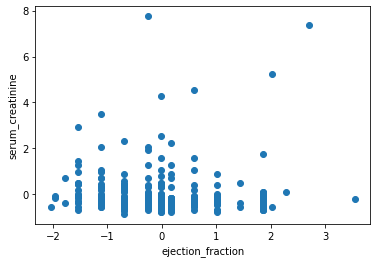

In [5]:
plt.scatter(X_heart[:, 0], X_heart[:, 1])
plt.xlabel('ejection_fraction')
plt.ylabel('serum_creatinine')
plt.show()

With this, we conclude the preprocessing step.

## 2) K-Means

We will now use the k-means clustering algorithm. First we use the elbow method to decide the number of clusters.

C:\Users\ericp\anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


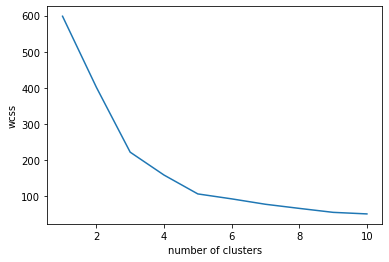

In [5]:
wcss = []
for i in range(1, 11):
    kmeans_heart = KMeans(n_clusters=i, random_state=0)
    kmeans_heart.fit(X_heart)
    wcss.append(kmeans_heart.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

Thus, we choose to use 5 clusters.

Next we use the algorithm to create the clusters and, since we are only using two attributes, we can visualize the result in the scatter plot.

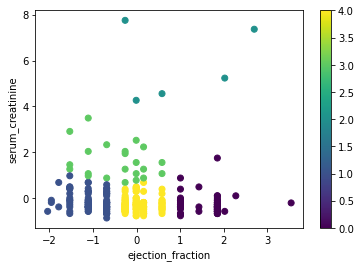

In [7]:
kmeans_heart = KMeans(n_clusters=5, random_state=0)
labels = kmeans_heart.fit_predict(X_heart)
plt.scatter(X_heart[:, 0], X_heart[:, 1], c=labels)
plt.xlabel('ejection_fraction')
plt.ylabel('serum_creatinine')
plt.colorbar()
plt.show()

Finally, we can create an array combining the information of the original data with the assigned cluster.

In [8]:
patients_kmeans = np.column_stack((df, labels))
patients_kmeans

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 4.000e+00, 1.000e+00,
        1.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 6.000e+00, 1.000e+00,
        4.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 7.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 2.780e+02, 0.000e+00,
        0.000e+00],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 2.800e+02, 0.000e+00,
        4.000e+00],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 2.850e+02, 0.000e+00,
        4.000e+00]])

## 3) Hierarchical Clustering

We will now do the clustering with the hierarchical clustering algorithm. First we generate the dendrogram.

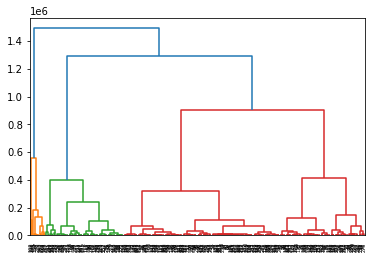

In [9]:
dendro = dendrogram(linkage(df, method='ward'))

Analising the dendrogram, we obtain that the optimal number of clusters for hierarchical clustering is 4 or 5. We will choose 5 clusters.

Next we will use the hierarchical clustering algorithm to create the clusters and then we will visualize the results.

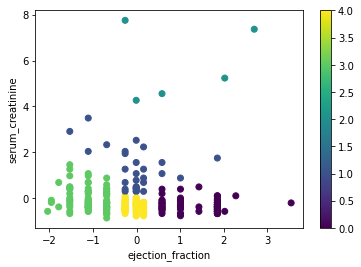

In [10]:
hc_heart = AgglomerativeClustering(n_clusters = 5, linkage='ward', affinity='euclidean')
labels = hc_heart.fit_predict(X_heart)
plt.scatter(X_heart[:, 0], X_heart[:, 1], c=labels)
plt.xlabel('ejection_fraction')
plt.ylabel('serum_creatinine')
plt.colorbar()
plt.show()

Finally, we put the clusters in an array with the rest of the data.

In [11]:
patients_hc = np.column_stack((df, labels))
patients_hc

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 4.000e+00, 1.000e+00,
        3.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 6.000e+00, 1.000e+00,
        4.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 7.000e+00, 1.000e+00,
        3.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 2.780e+02, 0.000e+00,
        0.000e+00],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 2.800e+02, 0.000e+00,
        4.000e+00],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 2.850e+02, 0.000e+00,
        0.000e+00]])

## 4) DBSCAN

The final clustering algorithm we are going to use is the DBSCAN algorithm.

In [12]:
dbscan_heart = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan_heart.fit_predict(X_heart)
np.unique(labels, return_counts=True)

(array([-1,  0], dtype=int64), array([ 14, 285], dtype=int64))

The -1 label represents points that weren't assigned to any cluster, therefore, we have only one cluster. We must now try diferent values of eps and min_samples to obtain better results.

In [13]:
dbscan_heart = DBSCAN(eps=0.25, min_samples=5)
labels = dbscan_heart.fit_predict(X_heart)
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64),
 array([50, 12, 60, 31, 30, 32, 18, 43,  8, 15], dtype=int64))

In [14]:
dbscan_heart = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan_heart.fit_predict(X_heart)
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64),
 array([ 36,  15, 117,  31,  32,  33,  19,  16], dtype=int64))

In [15]:
dbscan_heart = DBSCAN(eps=0.35, min_samples=3)
labels = dbscan_heart.fit_predict(X_heart)
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64),
 array([ 23,  19, 120,   3,  31,  34,  33,  19,  17], dtype=int64))

In [16]:
dbscan_heart = DBSCAN(eps=0.35, min_samples=7)
labels = dbscan_heart.fit_predict(X_heart)
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64),
 array([ 33,  19, 117,  31,  32,  32,  19,  16], dtype=int64))

In [17]:
dbscan_heart = DBSCAN(eps=0.35, min_samples=5)
labels = dbscan_heart.fit_predict(X_heart)
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64),
 array([ 30,  19, 119,  31,  32,  33,  19,  16], dtype=int64))

We will use this final result. Now we can visualize it in a scatter plot.

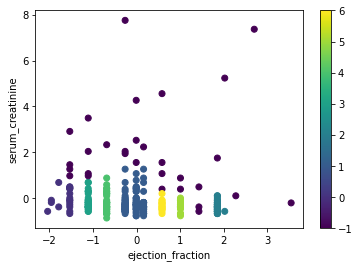

In [18]:
plt.scatter(X_heart[:, 0], X_heart[:, 1], c=labels)
plt.xlabel('ejection_fraction')
plt.ylabel('serum_creatinine')
plt.colorbar()
plt.show()

In [19]:
patients_dbscan = np.column_stack((df, labels))
patients_dbscan

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 4.000e+00, 1.000e+00,
        0.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 6.000e+00, 1.000e+00,
        1.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 7.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 2.780e+02, 0.000e+00,
        2.000e+00],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 2.800e+02, 0.000e+00,
        1.000e+00],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 2.850e+02, 0.000e+00,
        6.000e+00]])